In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 상관분석, 상관계수
1. 변수들이 서로 독립적인지 아니면 서로 영향을 주는 관계인지 알아내는 분석 방법
2. 두 변수간의 관계를 강도로 나타낸다 -> 상관 계수
3. 관계 강도의 정도(0~1)와 방향(+, -)을 하나의 수치로 요약한다.
4. 지수 [(-1) ~ (+1)]로 리턴된다.
5. pearson : 상관행렬 -> 변수 쌍
 * 상관계수 (양수_두 변의 수가 같이 증가하거나 감소, 음주, _변수 하나가 증가하면 다른 하나는 감소) ex) 
 * 게임을 많이 하면 성적이 떨어진다.(음수), 
 * 공부룰 많이 하면()자격증도 늘어난다.(양수)
 >상관 계수 
 - 0.0 ~ 0.2 -> 관계 전혀 없다.
 - 0.2 ~ 0.4 -> 약한 상관관계
 - 0.4 ~ 0.6 -> 상관관계 있다.
 - 0.6 ~ 0.8 -> 강한 상관관계
 - 0.8 ~ 1.0 -> 매우 강한 상관관계 
 
6. spearman : 상관계수의 절대값이 큰수록 변수 사이에 강한 관계가 있다라고 판단 = 완벽한 선형관계 
- ML 선형관계 시각화: 원시데이터의 순위를 매길 때 사용한다.
- 신뢰구간을 잡고 상관계수를 통해 결과를 판단할 때 사용된다.
6. df.corr(method)

In [3]:
# 1) 타이타닉의 상관관꼐를 살펴보자.
titanic.corr(method = 'pearson')

/var/folders/8w/n7c94rx9259cqqy815cxfms00000gn/T/ipykernel_41990/1547531486.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr(method = 'pearson')


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [10]:
#2) 타이타닉의 상관계수값을 리턴 받아 보자.
# survived, adult_male 에 대한 상관계수
titanic['survived'].corr(titanic['adult_male'], method = 'pearson')

-0.5570800422053256

In [5]:
#3) 성별에 대한 생종률 관계를 생각해보자. : 중복칼럼 제거, 결측치 처리, 수치화
# 데이터 전체를 확인 후 문자열이 있으면 수지화가 되어야 한다.
# mail = 1, female = 0
# 특정열의 값을 변경 -> df['열이름'].map(dict type)
titanic
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [12]:
titanic['survived'].corr(titanic['sex'], method = 'pearson')

-0.5433513806577546

In [25]:
#4) apply() 특정열/ 모든열의 값을 변경하자. df['열이름'].apply(사용자정의함수, 'axis = 0) 
titanic

age_mean = titanic['age'].mean()
titanic['age'].fillna(age_mean, inplace=True)

def r_age(x):
    res = int(x//10)*10
    return res 

titanic['n_age'] = titanic['age'].apply(r_age)

In [24]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,n_age
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30


In [29]:
#5) pd.cut(데이터, 구간개수, 레이블명): 수치형 데이터를 특정구간으로 나눌 때 사용
titanic['age_class']=pd.cut(titanic['age'], 3,labels=['child','young','old'])
titanic[['age','age_class']].head

<bound method NDFrame.head of            age age_class
0    22.000000     child
1    38.000000     young
2    26.000000     child
3    35.000000     young
4    35.000000     young
..         ...       ...
886  27.000000     young
887  19.000000     child
888  29.699118     young
889  26.000000     child
890  32.000000     young

[891 rows x 2 columns]>

In [28]:
#6) 구간을 나누어서 개수를 확인
titanic['age_class'].value_counts()

young    522
child    319
old       50
Name: age_class, dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

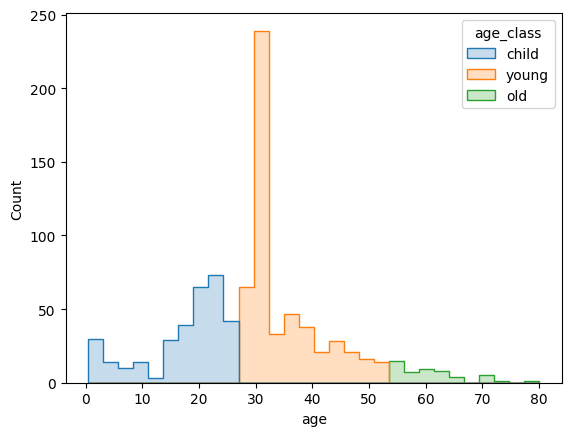

In [33]:
#7) 나눈 구간을 시각화로 확인
sns.histplot(data = titanic, x = 'age', hue = 'age_class', element = 'step')

In [34]:
#8) qcut() : 동일한 개수로 나눈다 d.qcut(데이터, 구간개수, 레이블명):
titanic['age_class_q']=pd.qcut(titanic['age'], 3,labels=['child','young','old'])
titanic[['age','age_class_q']].head()

,age,age_class_q
0,22.0,child
1,38.0,old
2,26.0,young
3,35.0,old
4,35.0,old


<AxesSubplot: xlabel='age', ylabel='Count'>

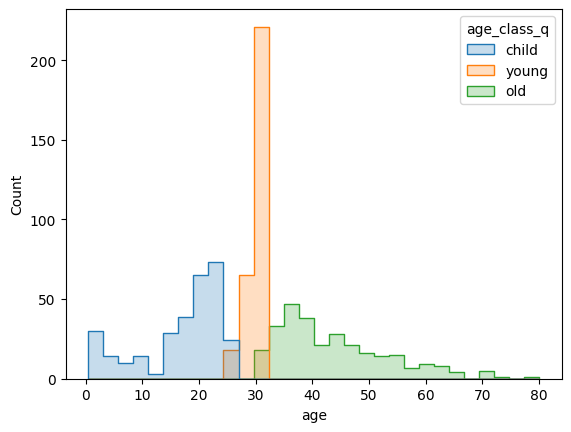

In [35]:
sns.histplot(data = titanic, x = 'age', hue = 'age_class_q', element = 'step')

데이터 수집 -> 데이터 정제 -> 데이터 분석 -> 데이터 시각화

- 라인플롯(시간변화), 
- 바 차트(비교 랭킹), 
- 파이 차트(점유율), 
- 히스토그램(분포도), 
- 산점도(연관성)